In [118]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import re
from glob import glob

In [119]:
top = '/Scratch/dh146/projects/niwa-downscaling/runs-csv.bak.20210202/'
nz_6_regions = ('ENI', 'ESI', 'NNI', 'NSI', 'WNI', 'WSI')

In [120]:
dfs = []
for std in ('-std', ''):
    for var in ('rain', 'temp'):
        for member in range(-1, 25):
            for test in range(10):
                f = f'{top}/*-deuce-member-test{var}-lr0.1-member{member}-t{test}{std}.scalar.csv'
                f = glob(f)[0]
                df = pd.read_csv(f, index_col=0, header=0)
                df = pd.pivot_table(df, columns=['tag'], index=['step'], values='value')
                df['Normalized'], df['Variable'], df['Member'], df['TestId'] = std == '-std', var, member, test
                dfs.append(df)

In [121]:
all_results = pd.concat(dfs)

In [122]:
all_results

tag   Test/Acc_ENI  Test/Acc_ESI  Test/Acc_NNI  Test/Acc_NSI  Test/Acc_WNI  \
step                                                                         
0         0.280702      0.350877      0.350877      0.315789      0.263158   
1         0.280702      0.350877      0.350877      0.315789      0.263158   
2         0.280702      0.350877      0.350877      0.315789      0.263158   
3         0.280702      0.350877      0.350877      0.315789      0.263158   
4         0.280702      0.350877      0.350877      0.315789      0.263158   
...            ...           ...           ...           ...           ...   
115       0.736842      0.736842      0.736842      0.561404      0.771930   
116       0.736842      0.754386      0.736842      0.561404      0.771930   
117       0.736842      0.736842      0.736842      0.578947      0.771930   
118       0.736842      0.736842      0.736842      0.561404      0.771930   
119       0.736842      0.736842      0.736842      0.561404      0.771930   

tag   Test/Acc_WSI  Test/Loss  Test/MSELoss  Train/Loss  Val/Loss  Normalized  \
step                                                                            
0         0.280702   1.369849      1.369849    0.948350  0.948520        True   
1         0.280702   1.369833      1.369833    1.007685  0.891876        True   
2         0.280702   1.369814      1.369814    1.027928  1.083391        True   
3         0.280702   1.369794      1.369794    0.957164  1.196561        True   
4         0.280702   1.369745      1.369745    0.991373  1.019139        True   
...            ...        ...           ...         ...       ...         ...   
115       0.631579   0.347114      0.347114    0.279854  0.198665       False   
116       0.614035   0.340992      0.340992    0.171403  0.177763       False   
117       0.614035   0.340662      0.340662    0.195726  0.188239       False   
118       0.614035   0.344922      0.344922    0.196736  0.191771       False   
119       0.614035   0.346142      0.346142    0.154592  0.186310       False   

tag  Variable  Member  TestId  
step                           
0        rain      -1       0  
1        rain      -1       0  
2        rain      -1       0  
3        rain      -1       0  
4        rain      -1       0  
...       ...     ...     ...  
115      temp      24       9  
116      temp      24       9  
117      temp      24       9  
118      temp      24       9  
119      temp      24       9  

[124800 rows x 14 columns]

<AxesSubplot:xlabel='step'>

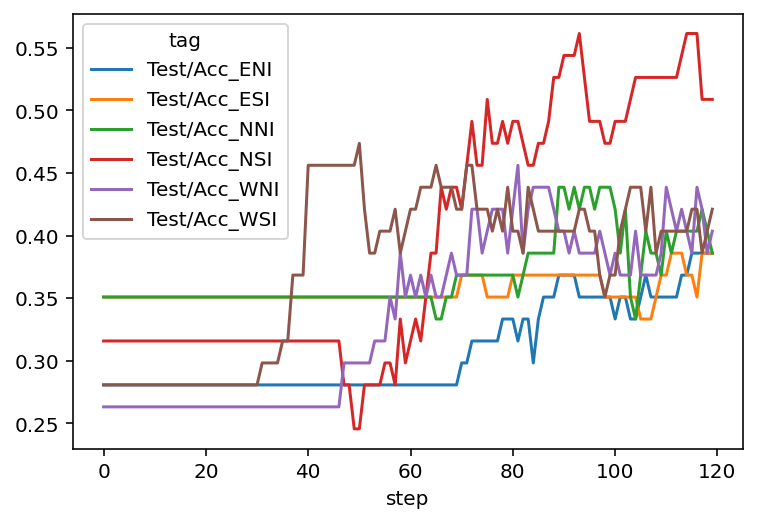

In [123]:
dfs[0].filter(like='Acc').plot()

In [124]:
dfs[0]

tag   Test/Acc_ENI  Test/Acc_ESI  Test/Acc_NNI  Test/Acc_NSI  Test/Acc_WNI  \
step                                                                         
0         0.280702      0.350877      0.350877      0.315789      0.263158   
1         0.280702      0.350877      0.350877      0.315789      0.263158   
2         0.280702      0.350877      0.350877      0.315789      0.263158   
3         0.280702      0.350877      0.350877      0.315789      0.263158   
4         0.280702      0.350877      0.350877      0.315789      0.263158   
...            ...           ...           ...           ...           ...   
115       0.385965      0.368421      0.403509      0.561404      0.385965   
116       0.385965      0.350877      0.403509      0.561404      0.438596   
117       0.385965      0.385965      0.421053      0.508772      0.421053   
118       0.385965      0.385965      0.403509      0.508772      0.385965   
119       0.385965      0.385965      0.385965      0.508772      0.403509   

tag   Test/Acc_WSI  Test/Loss  Test/MSELoss  Train/Loss  Val/Loss  Normalized  \
step                                                                            
0         0.280702   1.369849      1.369849    0.948350  0.948520        True   
1         0.280702   1.369833      1.369833    1.007685  0.891876        True   
2         0.280702   1.369814      1.369814    1.027928  1.083391        True   
3         0.280702   1.369794      1.369794    0.957164  1.196561        True   
4         0.280702   1.369745      1.369745    0.991373  1.019139        True   
...            ...        ...           ...         ...       ...         ...   
115       0.421053   1.275387      1.275387    0.592854  0.443420        True   
116       0.421053   1.267700      1.267700    0.395295  0.386495        True   
117       0.385965   1.258906      1.258906    0.530006  0.360210        True   
118       0.403509   1.262850      1.262850    0.444763  0.374917        True   
119       0.421053   1.253285      1.253285    0.526521  0.403489        True   

tag  Variable  Member  TestId  
step                           
0        rain      -1       0  
1        rain      -1       0  
2        rain      -1       0  
3        rain      -1       0  
4        rain      -1       0  
...       ...     ...     ...  
115      rain      -1       0  
116      rain      -1       0  
117      rain      -1       0  
118      rain      -1       0  
119      rain      -1       0  

[120 rows x 14 columns]

In [125]:
acc_results = pd.pivot_table(all_results, index='step', columns=['Variable', 'Normalized', 'Member', 'TestId'],
               values=[f'Test/Acc_{region}' for region in nz_6_regions])
acc_results

tag        Test/Acc_ENI                                                    \
Variable           rain                                                     
Normalized        False                                                     
Member              -1                                                      
TestId                0         1         2         3         4         5   
step                                                                        
0              0.210526  0.508772  0.210526  0.245614  0.508772  0.508772   
1              0.210526  0.210526  0.210526  0.210526  0.210526  0.508772   
2              0.508772  0.210526  0.508772  0.508772  0.210526  0.210526   
3              0.508772  0.210526  0.210526  0.508772  0.508772  0.210526   
4              0.210526  0.210526  0.210526  0.508772  0.210526  0.210526   
...                 ...       ...       ...       ...       ...       ...   
115            0.298246  0.280702  0.298246  0.280702  0.263158  0.368421   
116            0.280702  0.280702  0.280702  0.280702  0.263158  0.298246   
117            0.280702  0.280702  0.280702  0.298246  0.385965  0.298246   
118            0.298246  0.280702  0.280702  0.280702  0.385965  0.315789   
119            0.280702  0.298246  0.280702  0.280702  0.421053  0.315789   

tag                                                 ... Test/Acc_WSI  \
Variable                                            ...         temp   
Normalized                                          ...        True    
Member                                              ...           24   
TestId             6         7         8         9  ...            0   
step                                                ...                
0           0.210526  0.210526  0.210526  0.210526  ...     0.263158   
1           0.210526  0.210526  0.210526  0.210526  ...     0.263158   
2           0.192982  0.210526  0.210526  0.508772  ...     0.263158   
3           0.210526  0.508772  0.210526  0.210526  ...     0.263158   
4           0.508772  0.508772  0.210526  0.210526  ...     0.263158   
...              ...       ...       ...       ...  ...          ...   
115         0.298246  0.298246  0.315789  0.403509  ...     0.596491   
116         0.280702  0.298246  0.368421  0.333333  ...     0.596491   
117         0.280702  0.298246  0.473684  0.368421  ...     0.596491   
118         0.280702  0.280702  0.385965  0.350877  ...     0.596491   
119         0.280702  0.385965  0.438596  0.333333  ...     0.596491   

tag                                                                     \
Variable                                                                 
Normalized                                                               
Member                                                                   
TestId             1         2         3         4         5         6   
step                                                                     
0           0.263158  0.263158  0.263158  0.263158  0.263158  0.263158   
1           0.263158  0.263158  0.263158  0.263158  0.263158  0.263158   
2           0.263158  0.263158  0.263158  0.263158  0.263158  0.263158   
3           0.263158  0.263158  0.263158  0.263158  0.263158  0.263158   
4           0.263158  0.263158  0.263158  0.263158  0.263158  0.263158   
...              ...       ...       ...       ...       ...       ...   
115         0.614035  0.596491  0.491228  0.596491  0.649123  0.596491   
116         0.614035  0.596491  0.508772  0.596491  0.649123  0.596491   
117         0.614035  0.596491  0.473684  0.596491  0.649123  0.614035   
118         0.614035  0.596491  0.491228  0.596491  0.649123  0.614035   
119         0.631579  0.596491  0.508772  0.596491  0.649123  0.614035   

tag                                       
Variable                                  
Normalized                                
Member                                    
TestId             7         8    

In [126]:
test_bests = all_results.groupby(['Variable', 'Normalized', 'Member', 'TestId']).max()
test_bests

tag                                Test/Acc_ENI  Test/Acc_ESI  Test/Acc_NNI  \
Variable Normalized Member TestId                                             
rain     False      -1     0           0.578947      0.438596      0.473684   
                           1           0.526316      0.508772      0.456140   
                           2           0.508772      0.421053      0.491228   
                           3           0.508772      0.473684      0.508772   
                           4           0.543860      0.421053      0.526316   
...                                         ...           ...           ...   
temp     True        24    5           0.771930      0.684211      0.789474   
                           6           0.771930      0.719298      0.824561   
                           7           0.754386      0.701754      0.807018   
                           8           0.789474      0.719298      0.807018   
                           9           0.771930      0.684211      0.807018   

tag                                Test/Acc_NSI  Test/Acc_WNI  Test/Acc_WSI  \
Variable Normalized Member TestId                                             
rain     False      -1     0           0.526316      0.526316      0.561404   
                           1           0.596491      0.561404      0.614035   
                           2           0.526316      0.508772      0.543860   
                           3           0.596491      0.473684      0.578947   
                           4           0.596491      0.526316      0.631579   
...                                         ...           ...           ...   
temp     True        24    5           0.614035      0.771930      0.666667   
                           6           0.578947      0.771930      0.631579   
                           7           0.596491      0.771930      0.614035   
                           8           0.614035      0.807018      0.701754   
                           9           0.596491      0.789474      0.596491   

tag                                Test/Loss  Test/MSELoss    Train/Loss  \
Variable Normalized Member TestId                                          
rain     False      -1     0             inf           inf  30788.494141   
                           1             inf           inf  27780.812500   
                           2             inf           inf  37903.292969   
                           3             inf           inf  38645.601562   
                           4             inf           inf  33473.207031   
...                                      ...           ...           ...   
temp     True        24    5        1.645085      1.645085      1.209843   
                           6        1.645612      1.645612      0.975342   
                           7        1.645054      1.645054      1.164421   
                           8        1.646255      1.646255      1.232689   
                           9        1.781292      1.781292      1.317610   

tag                                Val/Loss  
Variable Normalized Member TestId            
rain     False      -1     0            inf  
                           1            inf  
                           2            inf  
                           3            inf  
                           4            inf  
...                                     ...  
temp     True        24    5       1.987522  
                           6       1.772278  
                           7       1.738563  
                           8       1.859885  
                           9       1.435857  

[1040 rows x 10 columns]

In [127]:
test_bests.loc[('rain', True)]

tag            Test/Acc_ENI  Test/Acc_ESI  Test/Acc_NNI  Test/Acc_NSI  \
Member TestId                                                           
-1     0           0.385965      0.385965      0.438596      0.561404   
       1           0.298246      0.368421      0.368421      0.526316   
       2           0.280702      0.403509      0.350877      0.456140   
       3           0.298246      0.403509      0.350877      0.578947   
       4           0.298246      0.385965      0.368421      0.543860   
...                     ...           ...           ...           ...   
 24    5           0.315789      0.368421      0.368421      0.526316   
       6           0.333333      0.421053      0.385965      0.543860   
       7           0.315789      0.350877      0.350877      0.333333   
       8           0.280702      0.368421      0.368421      0.508772   
       9           0.298246      0.350877      0.350877      0.368421   

tag            Test/Acc_WNI  Test/Acc_WSI  Test/Loss  Test/MSELoss  \
Member TestId                                                        
-1     0           0.456140      0.473684   1.491038      1.491038   
       1           0.385965      0.456140   1.562431      1.562431   
       2           0.473684      0.456140   1.587103      1.587103   
       3           0.438596      0.473684   1.405210      1.405210   
       4           0.508772      0.456140   2.032083      2.032083   
...                     ...           ...        ...           ...   
 24    5           0.403509      0.456140   1.489059      1.489059   
       6           0.508772      0.456140   1.889361      1.889361   
       7           0.473684      0.526316   2.530343      2.530343   
       8           0.421053      0.456140   2.132259      2.132259   
       9           0.438596      0.543860   1.393631      1.393631   

tag            Train/Loss  Val/Loss  
Member TestId                        
-1     0         1.189291  1.488311  
       1         1.095067  1.436700  
       2         1.344973  1.712447  
       3         1.177012  1.624232  
       4         1.209840  1.921882  
...                   ...       ...  
 24    5         1.105632  1.411339  
       6         1.237043  1.782937  
       7         1.320652  2.147023  
       8         1.043529  1.913523  
       9         1.177359  1.382685  

[260 rows x 10 columns]

In [128]:
best_acc_ENI = pd.pivot_table(test_bests.loc[('rain', False)][['Test/Acc_ENI']], columns=['Member'], index='TestId')
best_acc_ENI

tag    Test/Acc_ENI                                                    \
Member          -1         0         1         2         3         4    
TestId                                                                  
0          0.578947  0.561404  0.596491  0.561404  0.508772  0.614035   
1          0.526316  0.543860  0.596491  0.508772  0.526316  0.578947   
2          0.508772  0.578947  0.526316  0.701754  0.526316  0.508772   
3          0.508772  0.526316  0.526316  0.508772  0.543860  0.561404   
4          0.543860  0.508772  0.666667  0.578947  0.631579  0.614035   
5          0.561404  0.649123  0.543860  0.508772  0.543860  0.508772   
6          0.578947  0.543860  0.596491  0.543860  0.561404  0.526316   
7          0.543860  0.561404  0.526316  0.561404  0.543860  0.578947   
8          0.561404  0.543860  0.614035  0.508772  0.596491  0.543860   
9          0.508772  0.526316  0.526316  0.543860  0.666667  0.561404   

tag                                             ...                      \
Member        5         6         7         8   ...        15        16   
TestId                                          ...                       
0       0.596491  0.526316  0.508772  0.649123  ...  0.526316  0.508772   
1       0.508772  0.561404  0.526316  0.578947  ...  0.666667  0.508772   
2       0.561404  0.561404  0.596491  0.508772  ...  0.526316  0.508772   
3       0.561404  0.508772  0.561404  0.561404  ...  0.561404  0.526316   
4       0.578947  0.561404  0.543860  0.596491  ...  0.543860  0.666667   
5       0.543860  0.508772  0.543860  0.631579  ...  0.526316  0.508772   
6       0.578947  0.684211  0.526316  0.543860  ...  0.631579  0.649123   
7       0.596491  0.561404  0.526316  0.578947  ...  0.578947  0.543860   
8       0.508772  0.508772  0.526316  0.526316  ...  0.508772  0.508772   
9       0.561404  0.596491  0.526316  0.508772  ...  0.526316  0.578947   

tag                                                                           \
Member        17        18        19        20        21        22        23   
TestId                                                                         
0       0.596491  0.578947  0.614035  0.543860  0.508772  0.614035  0.526316   
1       0.526316  0.684211  0.561404  0.526316  0.561404  0.666667  0.543860   
2       0.543860  0.561404  0.508772  0.578947  0.508772  0.526316  0.526316   
3       0.508772  0.508772  0.614035  0.561404  0.561404  0.561404  0.543860   
4       0.561404  0.719298  0.561404  0.561404  0.561404  0.649123  0.508772   
5       0.543860  0.526316  0.561404  0.578947  0.508772  0.596491  0.543860   
6       0.596491  0.596491  0.561404  0.543860  0.596491  0.508772  0.596491   
7       0.526316  0.561404  0.543860  0.578947  0.578947  0.614035  0.561404   
8       0.543860  0.508772  0.596491  0.543860  0.526316  0.543860  0.649123   
9       0.543860  0.561404  0.578947  0.543860  0.508772  0.561404  0.578947   

tag               
Member        24  
TestId            
0       0.526316  
1       0.543860  
2       0.561404  
3       0.578947  
4       0.561404  
5       0.649123  
6       0.561404  
7       0.561404  
8       0.596491  
9       0.543860  

[10 rows x 26 columns]

Text(0.5, 1.0, 'ENI Accuracy')

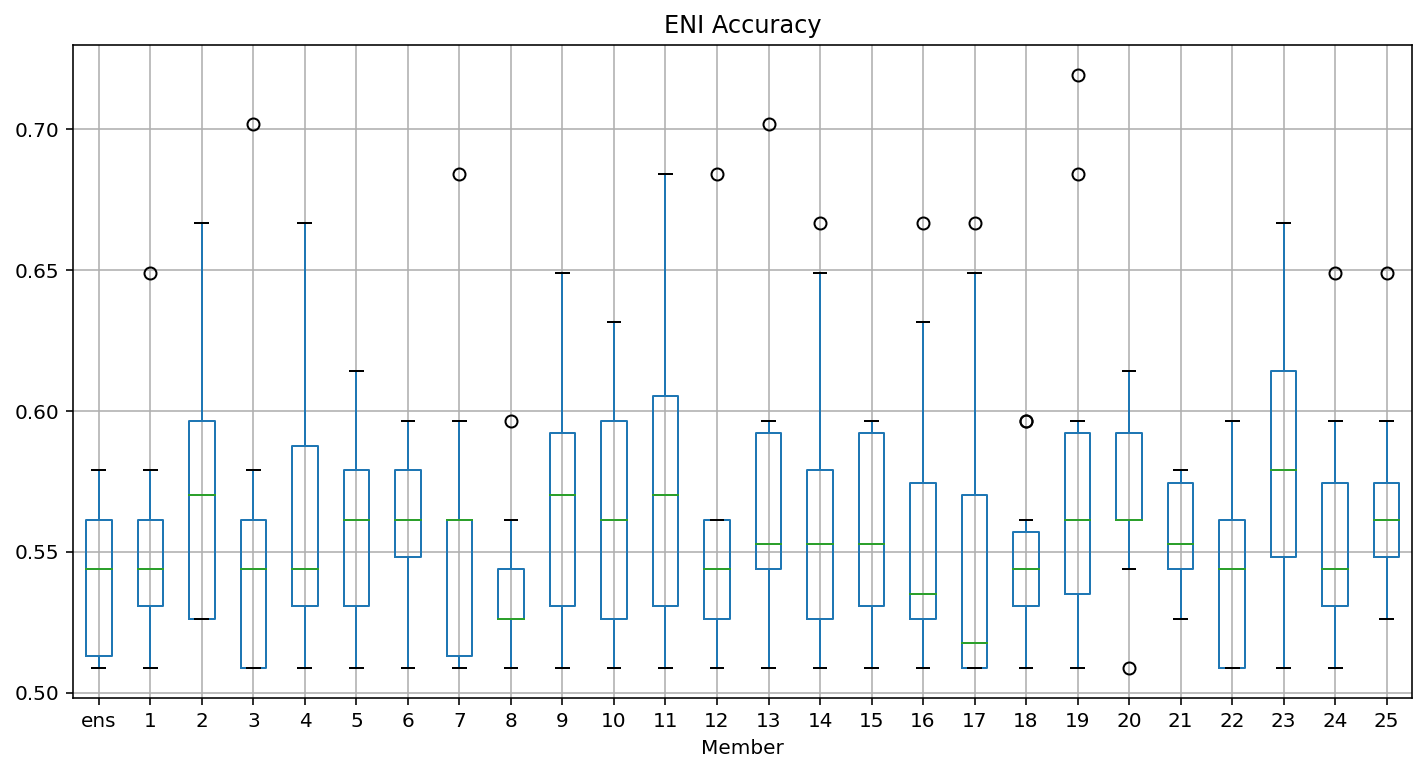

In [150]:
plt.figure(figsize=(12, 6))
best_acc_ENI.boxplot()
xticks = plt.xticks(range(1, 27), ['ens', *list(range(1, 26))])
plt.xlabel('Member')
plt.title('ENI Accuracy')

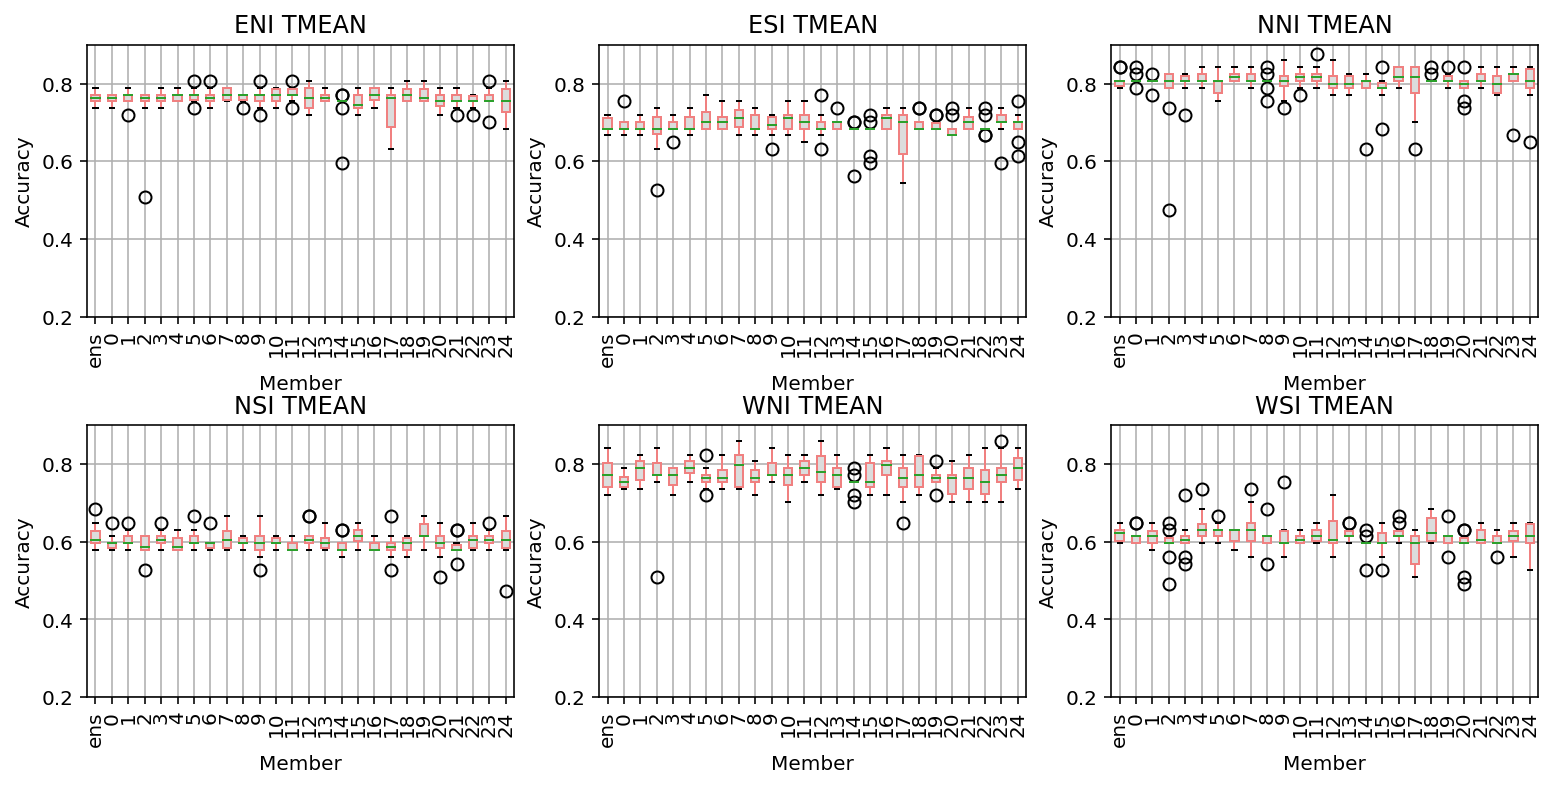

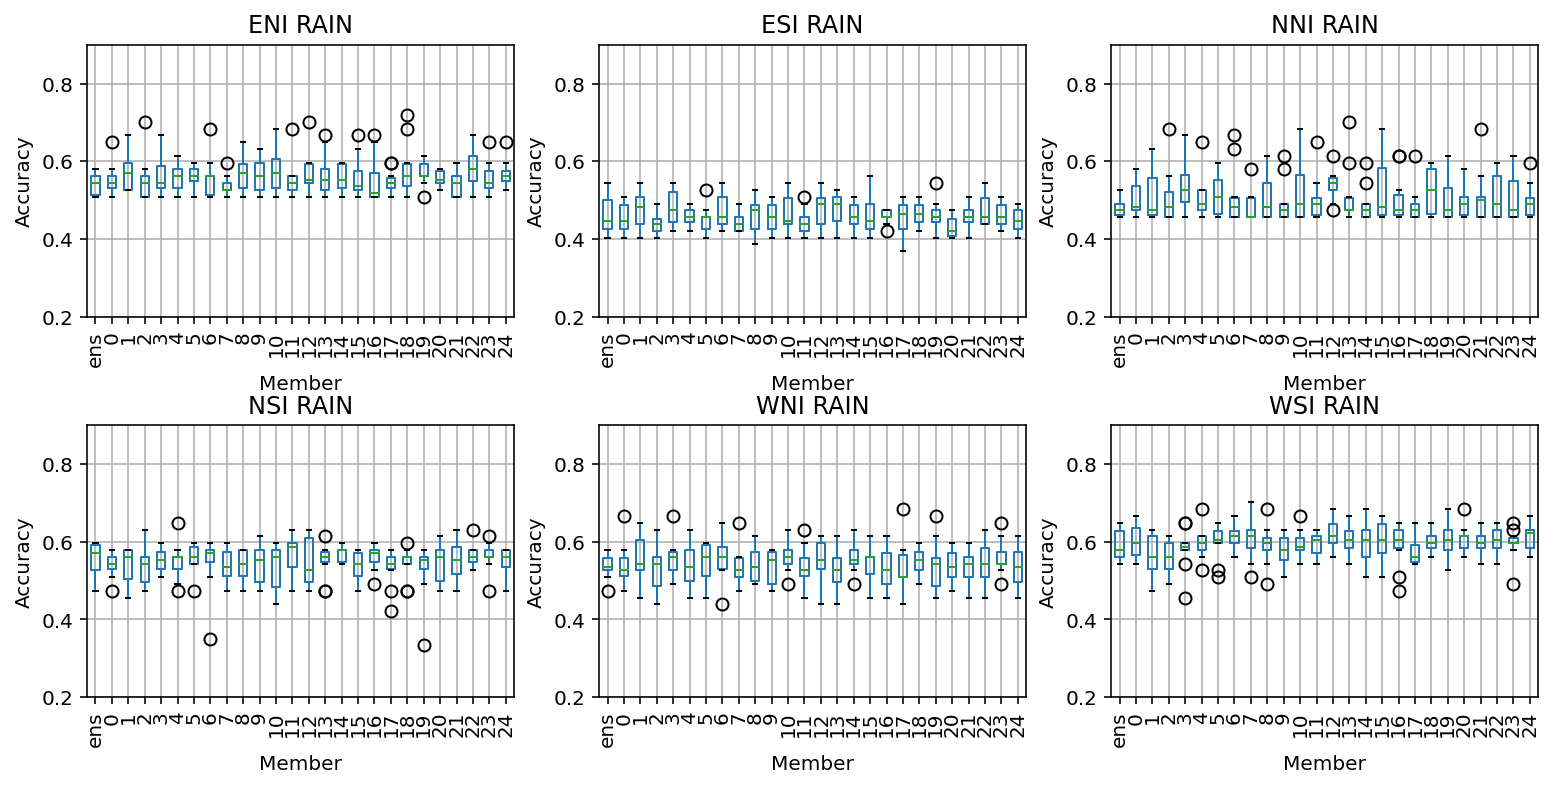

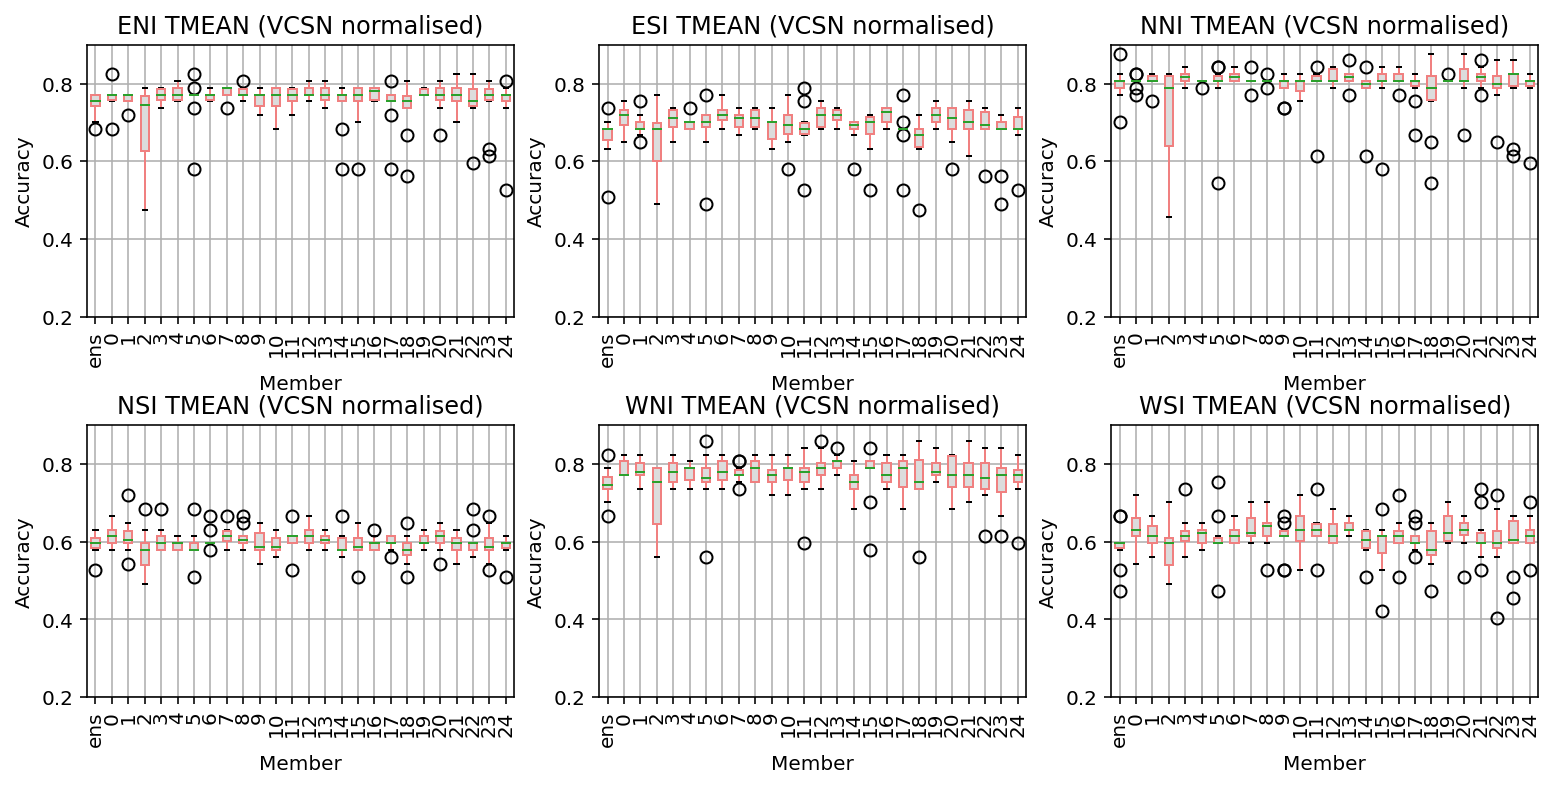

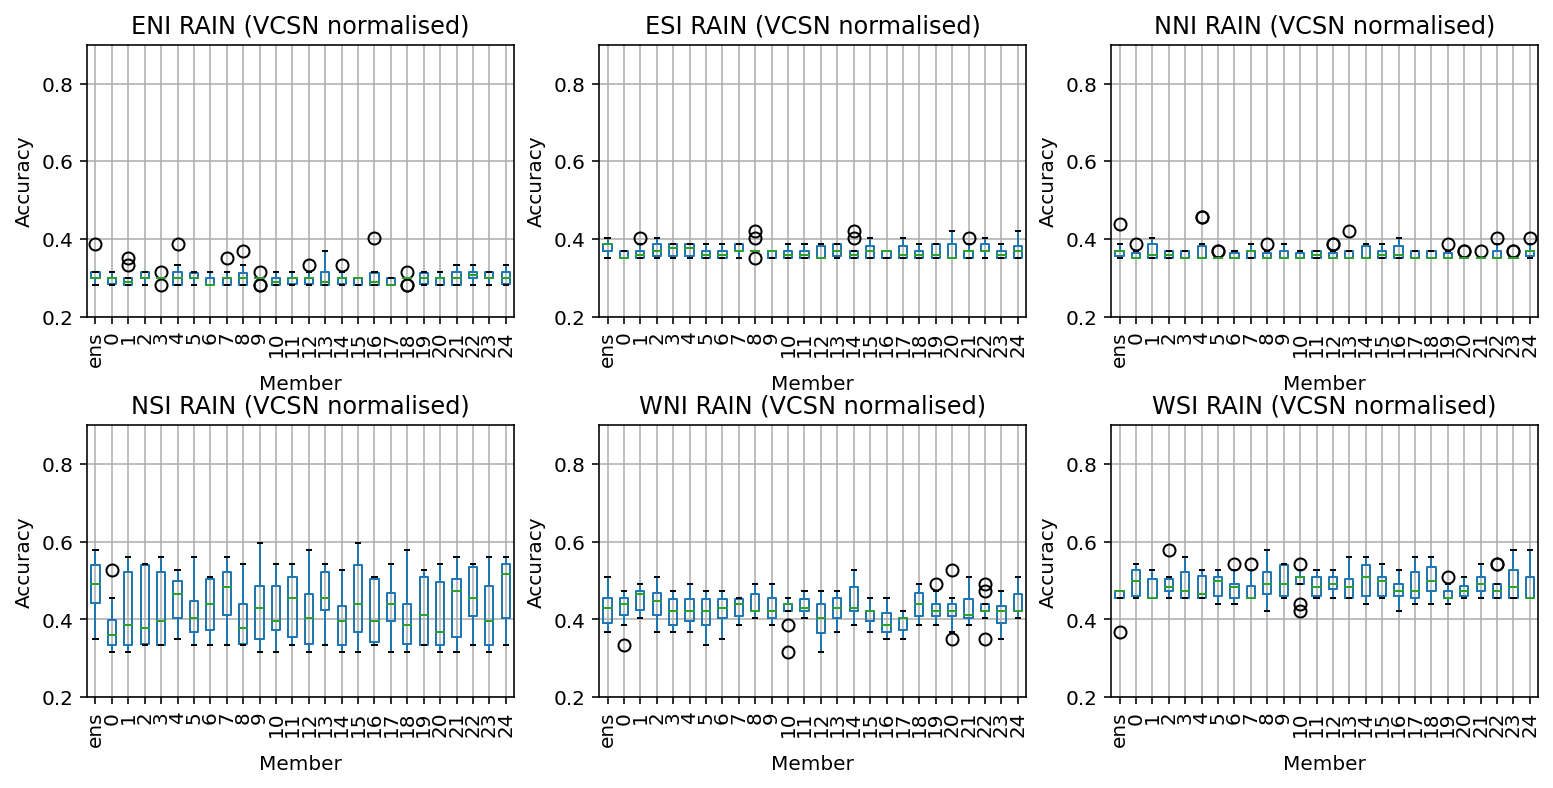

In [208]:
for normalized in (False, True):
    for var in ('temp', 'rain'):
        fig, axes = plt.subplots(2, 3, figsize=(13, 6))
        for ax, region in zip(axes.ravel(), nz_6_regions):
            _df = pd.pivot_table(test_bests.loc[(var, normalized)][[f'Test/Acc_{region}']], columns=['Member'], index='TestId')
            if var == 'temp':
                kwargs = {'patch_artist': True,
                          'boxprops': {'facecolor': 'gainsboro', 'color': 'lightcoral'},
                          'whiskerprops': {'color': 'lightcoral'}
                         }
            else:
                kwargs = {}
            _df.boxplot(ax=ax, **kwargs)
            ax.set_xticks(range(1, 27))
            ax.set_xticklabels(['ens', *range(25)], rotation=90)
            ax.set_xlabel('Member')
            aaa = dict([('rain', 'RAIN'), ('temp', 'TMEAN')])[var]
            bbb = ['', ' (VCSN normalised)'][normalized]
            ax.set_title(f'{region} {aaa}{bbb}')
            ax.set_ylabel('Accuracy')
            ax.set_ylim(0.2, 0.9)

        fig.subplots_adjust(hspace=0.4)
        plt.show()

In [209]:
!mkdir saved_images/acc-by_mem
for std in ('', '-std'):
    for var in ('rain', 'temp'):
        for region in nz_6_regions:
            plt.figure(figsize=(6, 4))
            normalized = std == '-std'
            
            
            _df = pd.pivot_table(test_bests.loc[(var, normalized)][[f'Test/Acc_{region}']], columns=['Member'], index='TestId')
            if var == 'temp':
                kwargs = {'patch_artist': True,
                          'boxprops': {'facecolor': 'gainsboro', 'color': 'lightcoral'},
                          'whiskerprops': {'color': 'lightcoral'}
                         }
            else:
                kwargs = {}
                
            _df.boxplot(**kwargs)
            
            plt.xticks(ticks=range(1, 27), labels=['ens', *range(25)], rotation=90)
            plt.xlabel('Member')
            
            aaa = dict([('rain', 'RAIN'), ('temp', 'TMEAN')])[var]
            bbb = ['', ' (VCSN normalised)'][normalized]
#             plt.title(f'{region} {aaa}{bbb}')
            
            plt.ylabel('Accuracy')
            plt.ylim(0.2, 0.9)
            plt.savefig(f'saved_images/acc-by_mem/{var}-{region}-accuracy-by_members{std}.pdf',
                       bbox_inches='tight')
            plt.close()


mkdir: cannot create directory ‘saved_images/acc-by_mem’: File exists


In [130]:
sssdf = pd.DataFrame(np.random.randn(10, 4), columns=['Col1', 'Col2', 'Col3', 'Col4'])
sssdf

Col1      Col2      Col3      Col4
0 -0.317369 -0.786605 -0.328971 -0.795953
1  1.874594 -0.471947  0.242294 -0.499944
2 -0.760688  0.910690 -0.693645 -0.335505
3  0.403582  0.326326  0.520260 -0.631059
4 -0.379924  0.382470 -1.381349 -0.876455
5  1.063789 -0.180121 -0.571818  0.334051
6 -1.175457  0.614772 -2.580812  0.621397
7  0.542764  0.938467 -1.085806 -1.137778
8 -1.031224  0.179353 -0.367622 -1.146806
9  0.501828 -1.602136 -1.593642 -0.594655

<AxesSubplot:>

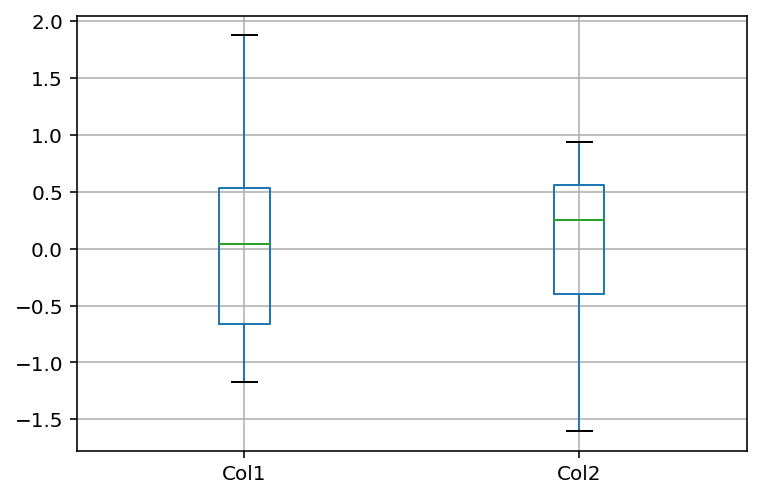

In [131]:
sssdf.boxplot(column=['Col1', 'Col2'])

<AxesSubplot:>

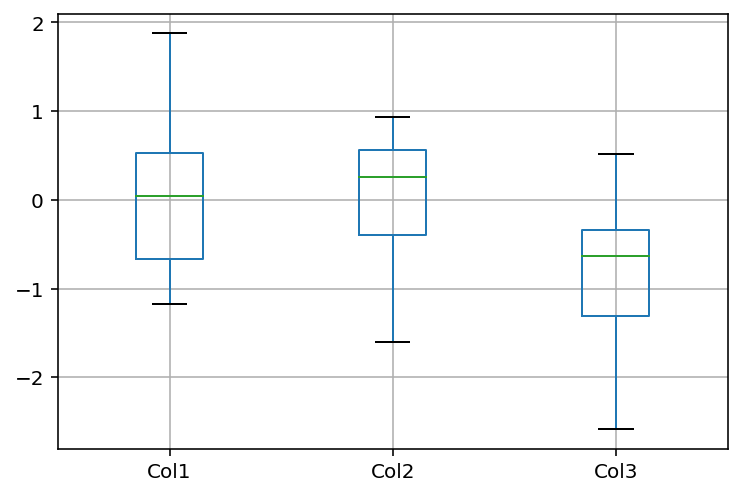

In [132]:
sssdf.boxplot(column=['Col1', 'Col2', 'Col3'])